Problem statement: To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

### Importing Skin Cancer Data

### Importing all the important libraries

In [1]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, BatchNormalization, Conv2D, MaxPooling2D

In [2]:
## If you are using the data by mounting the google drive, use the following :
from google.colab import drive
drive.mount('/content/gdrive')

##Ref:https://towardsdatascience.com/downloading-datasets-into-google-drive-via-google-colab-bcb1b30b0166

Mounted at /content/gdrive


This assignment uses a dataset of about 2357 images of skin cancer types. The dataset contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.

In [3]:
# Defining the path for train and test images
## Todo: Update the paths of the train and test dataset
data_dir_train = pathlib.Path("/content/gdrive/MyDrive/Train")
data_dir_test = pathlib.Path('/content/gdrive/MyDrive/Test')

In [4]:
#list directory in train folder
dir_train = os.listdir(data_dir_train)
dir_train.sort()
dir_train

['actinic keratosis',
 'basal cell carcinoma',
 'dermatofibroma',
 'melanoma',
 'nevus',
 'pigmented benign keratosis',
 'seborrheic keratosis',
 'squamous cell carcinoma',
 'vascular lesion']

In [5]:
#list dir in test folder
dir_test = os.listdir(data_dir_test)
dir_test.sort()
dir_test

['actinic keratosis',
 'basal cell carcinoma',
 'dermatofibroma',
 'melanoma',
 'nevus',
 'pigmented benign keratosis',
 'seborrheic keratosis',
 'squamous cell carcinoma',
 'vascular lesion']

In [6]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2239
118


### Load using keras.preprocessing

Let's load these images off disk using the helpful image_dataset_from_directory utility.

### Create a dataset

Define some parameters for the loader:

In [7]:
batch_size = 32
img_height = 180
img_width = 180

Use 80% of the images for training, and 20% for validation.

In [8]:
## Write your train dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
train_ds = tf.keras.preprocessing.image_dataset_from_directory(data_dir_train,image_size=(img_width,img_height),
                                                               batch_size=batch_size,validation_split=0.2,
                                                               subset='training',seed=123)##todo
train_ds

Found 2239 files belonging to 9 classes.
Using 1792 files for training.


<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 180, 180, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [9]:
## Write your validation dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
val_ds = tf.keras.preprocessing.image_dataset_from_directory(data_dir_train,image_size=(img_width,img_height),
                                                             batch_size=batch_size,validation_split=0.2,
                                                             subset='validation',seed=123)##todo
val_ds

Found 2239 files belonging to 9 classes.
Using 447 files for validation.


<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 180, 180, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [10]:
# List out all the classes of skin cancer and store them in a list.
# You can find the class names in the class_names attribute on these datasets.
# These correspond to the directory names in alphabetical order.
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


### Visualize the data

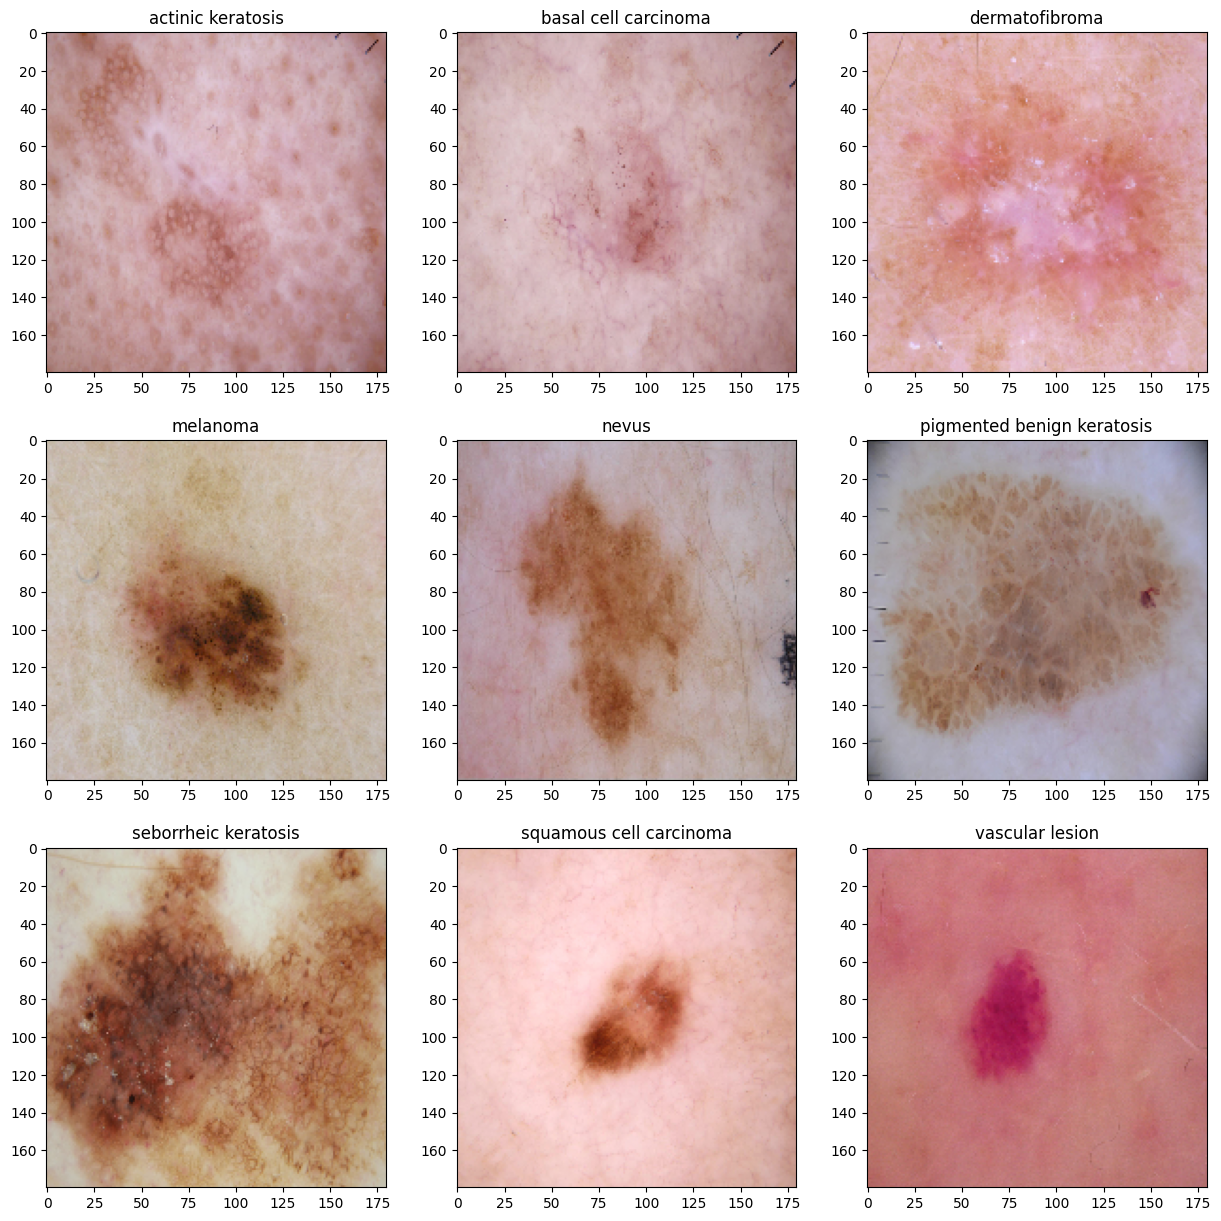

In [ ]:
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img

#Dictionary to store the path of image as per the class
files_path_dict = {}

for c in class_names:
    files_path_dict[c] = list(map(lambda x:str(data_dir_train)+'/'+c+'/'+x,os.listdir(str(data_dir_train)+'/'+c)))

#Visualize image
plt.figure(figsize=(15,15))
index = 0
for c in class_names:
    path_list = files_path_dict[c][:1]
    index += 1
    plt.subplot(3,3,index)
    plt.imshow(load_img(path_list[0],target_size=(img_height,img_width)))
    plt.title(c)

The `image_batch` is a tensor of the shape `(32, 180, 180, 3)`. This is a batch of 32 images of shape `180x180x3` (the last dimension refers to color channels RGB). The `label_batch` is a tensor of the shape `(32,)`, these are corresponding labels to the 32 images.

`Dataset.cache()` keeps the images in memory after they're loaded off disk during the first epoch.

`Dataset.prefetch()` overlaps data preprocessing and model execution while training.

In [11]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

### Creating the Model 1 || CNN Model 1
#### Todo: Create a CNN model, which can accurately detect 9 classes present in the dataset. Use ```layers.experimental.preprocessing.Rescaling``` to normalize pixel values between (0,1). The RGB channel values are in the `[0, 255]` range. This is not ideal for a neural network. Here, it is good to standardize values to be in the `[0, 1]`

In [ ]:
input_shape = (img_height,img_width,3)

model = Sequential()    #Sequential allows you to create models layer-by-layer

#First Convulation Layer
model.add(layers.experimental.preprocessing.Rescaling(1./255,input_shape=input_shape))
model.add(layers.Conv2D(32,kernel_size=(3,3),activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))

#Second Convulation Layer
model.add(layers.Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))

#Third Convulation Layer
model.add(layers.Conv2D(128,kernel_size=(3,3),activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))

model.add(layers.Flatten())   #Keras.layers.flatten function flattens the multi-dimensional input tensors into a single dimension.

#Dense Layer
model.add(layers.Dense(512,activation='relu'))

#Dense Layer
model.add(layers.Dense(128,activation='relu'))

#Dense Layer with softmax activation function.
#Softmax is an activation function that scales numbers/logits into probabilities.
model.add(layers.Dense(len(class_names),activation='softmax'))

### Compiling the Model 1 || CNN Model 1
Choose an appropirate optimiser and loss function for model training

In [ ]:
### Todo, choose an appropirate optimiser and loss function
model.compile(optimizer='adam',
              loss=tf.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

In [ ]:
# View the summary of all layers
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 89, 89, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 87, 87, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 43, 43, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 41, 41, 128)       7

### Training the Model 1 || CNN Model 1

In [ ]:
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 52s 910ms/step - loss: 2.0068 - accuracy: 0.2595 - val_loss: 1.8244 - val_accuracy: 0.3244
Epoch 2/20
56/56 [==============================] - 2s 38ms/step - loss: 1.6634 - accuracy: 0.3962 - val_loss: 1.4669 - val_accuracy: 0.5145
Epoch 3/20
56/56 [==============================] - 2s 38ms/step - loss: 1.4888 - accuracy: 0.4660 - val_loss: 1.4822 - val_accuracy: 0.5078
Epoch 4/20
56/56 [==============================] - 2s 38ms/step - loss: 1.4204 - accuracy: 0.5056 - val_loss: 1.3383 - val_accuracy: 0.5235
Epoch 5/20
56/56 [==============================] - 2s 38ms/step - loss: 1.3006 - accuracy: 0.5513 - val_loss: 1.3455 - val_accuracy: 0.5302
Epoch 6/20
56/56 [==============================] - 2s 43ms/step - loss: 1.2194 - accuracy: 0.5720 - val_loss: 1.3301 - val_accuracy: 0.5280
Epoch 7/20
56/56 [==============================] - 2s 38ms/step - loss: 1.1423 - accuracy: 0.5904 - val_loss: 1.3563 - val_accuracy: 0.5481
Epoch 8/20


### Visualizing the training results for Model 1 || CNN Model 1

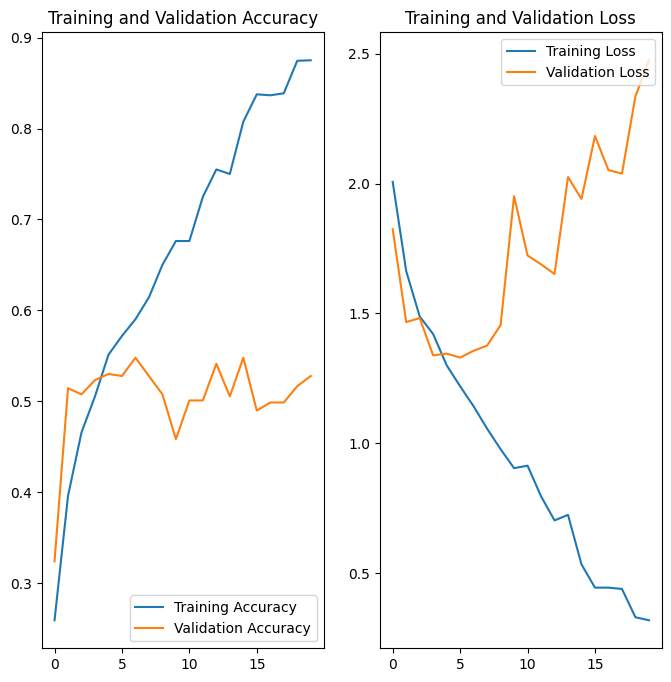

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### Observations for Model 1 || CNN Model 1

1. After 20 epochs,  Training accuracy is 87% and validation accuracy is 52%. The difference between both is very high and hence the model clearly overfitts.
2. Also the validation loss has an increasing trend with increasing no. of epochs whereas the training loss is showing a downward trend which also depicts overfitting.

### Applying Data Augmentation on Train Dataset

In [13]:
# Todo, after you have analysed the model fit history for presence of underfit or overfit, choose an appropriate data augumentation strategy.
# Your code goes here
rescale = tf.keras.Sequential([
  #To rescale an input in the [0, 255] range to be in the [0, 1] range
  layers.experimental.preprocessing.Rescaling(1./255)
])

data_augmentation = tf.keras.Sequential([
  #Randomly flip each image horizontally and vertically.
  layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),

  #Randomly rotate each image.
  layers.experimental.preprocessing.RandomRotation(0.2),

  #Randomly zoom each image during training.
  layers.experimental.preprocessing.RandomZoom(0.2),

  #Randomly translate each image during training.
  layers.experimental.preprocessing.RandomTranslation(0.1, 0.1)
])

## Visualizing Data after Data Augmentation

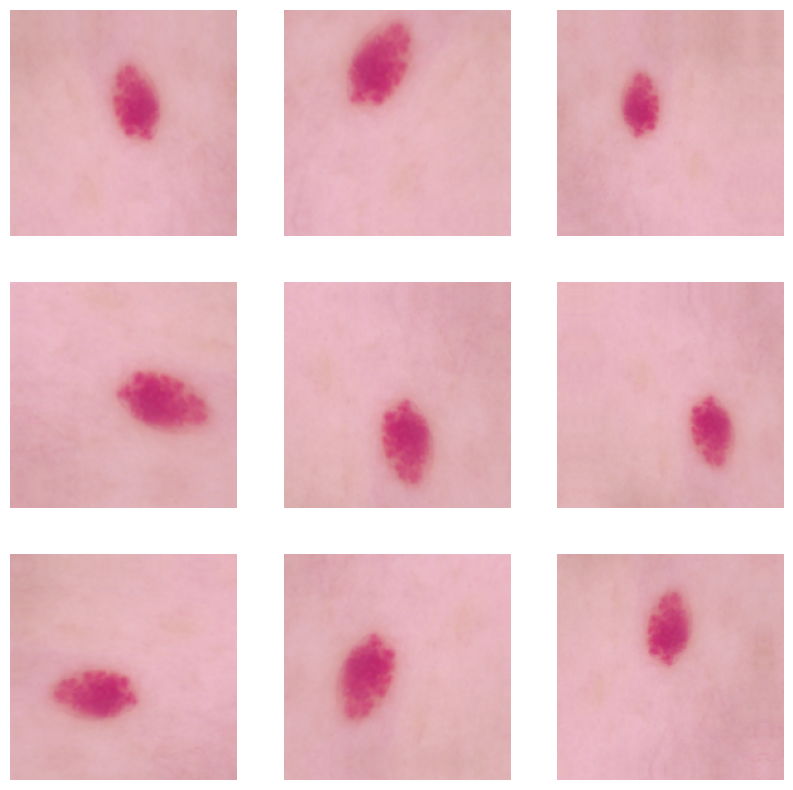

In [ ]:
# Todo, visualize how your augmentation strategy works for one instance of training image.
# Your code goes here
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off")

## Creating Model 2 || CNN Model 2 (With Data Augmentation & Dropout Layer)

In [14]:
model2 = Sequential()                     #Sequential allows you to create models layer-by-layer

model2.add(data_augmentation)             #Augmentation layer
model2.add(rescale)                       #Rescaling layer

#First Convulation Layer
model2.add(layers.Conv2D(32,kernel_size=(3,3),activation='relu'))
model2.add(layers.MaxPool2D(pool_size=(2,2)))
#Dropout layer with 25% Fraction of the input units to drop.
model2.add(layers.Dropout(0.25))

#Second Convulation Layer
model2.add(layers.Conv2D(64,kernel_size=(3,3),activation='relu'))
model2.add(layers.MaxPool2D(pool_size=(2,2)))
#Dropout layer with 25% Fraction of the input units to drop.
model2.add(layers.Dropout(0.25))

#Third Convulation Layer
model2.add(layers.Conv2D(128,kernel_size=(3,3),activation='relu'))
model2.add(layers.MaxPool2D(pool_size=(2,2)))

#Keras.layers.flatten function flattens the multi-dimensional input tensors into a single dimension.
model2.add(layers.Flatten())

#Dense Layer
model2.add(layers.Dense(512,activation='relu'))

#Dense Layer
model2.add(layers.Dense(128,activation='relu'))

#Dropout layer with 50% Fraction of the input units to drop.
model2.add(layers.Dropout(0.50))

#Dense Layer with softmax activation function.
#Softmax is an activation function that scales numbers/logits into probabilities.
model2.add(layers.Dense(len(class_names),activation='softmax'))

### Compiling Model 2 || CNN Model 2 (With Data Augmentation & Dropout Layer)

In [43]:
## Your code goes here
model2.compile(optimizer='adam',
              loss=tf.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

### Training Model 2 || CNN Model 2 (With Data Augmentation & Dropout Layer)

In [44]:
## Your code goes here, note: train your model for 20 epochs
epochs = 20
history = model2.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 34s 135ms/step - loss: 2.7129 - accuracy: 0.1713 - val_loss: 2.1431 - val_accuracy: 0.2058
Epoch 2/20
56/56 [==============================] - 4s 65ms/step - loss: 2.0653 - accuracy: 0.1847 - val_loss: 2.1105 - val_accuracy: 0.2260
Epoch 3/20
56/56 [==============================] - 4s 68ms/step - loss: 2.0427 - accuracy: 0.1908 - val_loss: 2.0591 - val_accuracy: 0.2550
Epoch 4/20
56/56 [==============================] - 4s 64ms/step - loss: 2.0405 - accuracy: 0.1992 - val_loss: 2.1175 - val_accuracy: 0.2058
Epoch 5/20
56/56 [==============================] - 4s 64ms/step - loss: 2.0152 - accuracy: 0.2277 - val_loss: 1.9577 - val_accuracy: 0.3221
Epoch 6/20
56/56 [==============================] - 4s 67ms/step - loss: 1.9447 - accuracy: 0.3002 - val_loss: 1.8870 - val_accuracy: 0.3356
Epoch 7/20
56/56 [==============================] - 4s 64ms/step - loss: 1.7807 - accuracy: 0.3599 - val_loss: 1.6834 - val_accuracy: 0.4273
Epoch 8/20


In [45]:
model2.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_2 (Sequential)   (None, 180, 180, 3)       0         
                                                                 
 sequential_1 (Sequential)   (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 89, 89, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 89, 89, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 87, 87, 64)        18496     
                                                      

### Visualizing the training results for Model 2 || CNN Model 2 (With Data Augmentation & Dropout Layer)

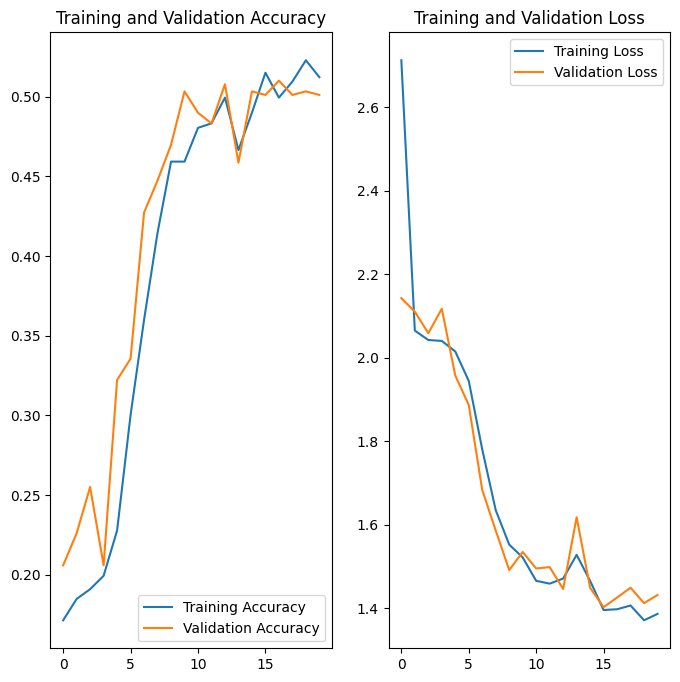

In [46]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### Observations for Model 2 || CNN Model 2 (With Data Augmentation & Dropout Layer)

1. With train accuracy of 51% and validation accuracy of 50% difference between the two is only 1% and hence we can observe that  overfitting issue of Model 1 is resolved after adding dropout layer and data augmentation.
2. The training and validation loss both show a downward trend and hence it also shows that overfitting issue of Model 1 is resolved.
3. However this model is having low training and validation accuracy and is underfitting and we will have to check the distribution of classes in the training set to check if there is class imbalance

## Class Imbalance Detection

#### **Context:** Many times real life datasets can have class imbalance, one class can have proportionately higher number of samples compared to the others. Class imbalance can have a detrimental effect on the final model quality. Hence as a sanity check it becomes important to check what is the distribution of classes in the data.

In [15]:
## Your code goes here.
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)

2239


In [16]:
from glob import glob
path_list = [x for x in glob(os.path.join(data_dir_train, '*', '*.jpg'))]
lesion_list = [os.path.basename(os.path.dirname(y)) for y in glob(os.path.join(data_dir_train, '*', '*.jpg'))]
dataframe_dict = dict(zip(path_list, lesion_list))
original_df = pd.DataFrame(list(dataframe_dict.items()),columns = ['Path','Label'])
original_df['Label'].value_counts()

pigmented benign keratosis    462
melanoma                      438
basal cell carcinoma          376
nevus                         357
squamous cell carcinoma       181
vascular lesion               139
actinic keratosis             114
dermatofibroma                 95
seborrheic keratosis           77
Name: Label, dtype: int64

### Observations for Class Distribution

- Which class has the least number of samples?
> The "seborrheic keratosis" class has the smallest number of samples, with just 77 images.

- Which classes dominate the data in terms proportionate number of samples?
> The "pigmented benign keratosis" class has the highest number of samples, with 462 images.

#### **Todo:** Rectify the class imbalance
To address this class imbalance, we can use the **Augmentor library** to generate new samples artificially.

In [17]:
!pip install Augmentor

To use `Augmentor`, the following general procedure is followed:

1. Instantiate a `Pipeline` object pointing to a directory containing your initial image data set.<br>
2. Define a number of operations to perform on this data set using your `Pipeline` object.<br>
3. Execute these operations by calling the `Pipeline’s` `sample()` method.


In [18]:
path_to_training_dataset=str(data_dir_train)+'/'
import Augmentor
for i in class_names:
    p = Augmentor.Pipeline(path_to_training_dataset + i)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

Initialised with 114 image(s) found.
Output directory set to /content/gdrive/MyDrive/Train/actinic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7D2431FDFD90>: 100%|██████████| 500/500 [00:22<00:00, 22.17 Samples/s]


Initialised with 376 image(s) found.
Output directory set to /content/gdrive/MyDrive/Train/basal cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7D2430127280>: 100%|██████████| 500/500 [00:21<00:00, 22.78 Samples/s]


Initialised with 95 image(s) found.
Output directory set to /content/gdrive/MyDrive/Train/dermatofibroma/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7D24328DB9A0>: 100%|██████████| 500/500 [00:18<00:00, 27.34 Samples/s]


Initialised with 438 image(s) found.
Output directory set to /content/gdrive/MyDrive/Train/melanoma/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7D243016DEA0>: 100%|██████████| 500/500 [01:22<00:00,  6.04 Samples/s]


Initialised with 357 image(s) found.
Output directory set to /content/gdrive/MyDrive/Train/nevus/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7D243019E620>: 100%|██████████| 500/500 [01:26<00:00,  5.76 Samples/s]


Initialised with 462 image(s) found.
Output directory set to /content/gdrive/MyDrive/Train/pigmented benign keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7D24329BB610>: 100%|██████████| 500/500 [00:19<00:00, 26.05 Samples/s]


Initialised with 77 image(s) found.
Output directory set to /content/gdrive/MyDrive/Train/seborrheic keratosis/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1024x768 at 0x7D24301252A0>: 100%|██████████| 500/500 [00:40<00:00, 12.40 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/gdrive/MyDrive/Train/squamous cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7D2430127A60>: 100%|██████████| 500/500 [00:19<00:00, 25.96 Samples/s]


Initialised with 139 image(s) found.
Output directory set to /content/gdrive/MyDrive/Train/vascular lesion/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7D243018FDC0>: 100%|██████████| 500/500 [00:18<00:00, 26.92 Samples/s]


Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.. Lets take a look at total count of augmented images.

In [19]:
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

4500


### Distribution of augmented data after adding new images to the original training data.

In [21]:
from glob import glob
path_list_new = [x for x in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
path_list_new[:2]

['/content/gdrive/MyDrive/Train/melanoma/output/melanoma_original_ISIC_0000441.jpg_9248bad7-abdf-4184-b959-312e0da4cdb2.jpg',
 '/content/gdrive/MyDrive/Train/melanoma/output/melanoma_original_ISIC_0000553.jpg_a6c1135b-919b-4870-8faf-5ed0fcf2136c.jpg']

In [20]:
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
lesion_list_new[:2]

['melanoma', 'melanoma']

In [22]:
dataframe_dict_new = dict(zip(path_list_new, lesion_list_new))

In [23]:
df2 = pd.DataFrame(list(dataframe_dict_new.items()),columns = ['Path','Label'])
new_df = original_df.append(df2)

<ipython-input-23-17a6b079869a>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df = original_df.append(df2)


In [24]:
new_df['Label'].value_counts()

pigmented benign keratosis    962
melanoma                      938
basal cell carcinoma          876
nevus                         857
squamous cell carcinoma       681
vascular lesion               639
actinic keratosis             614
dermatofibroma                595
seborrheic keratosis          577
Name: Label, dtype: int64

So, now we have added 500 images to all the classes to maintain some class balance. We can add more images as we want to improve training process.

#### Training the model on the data created using Augmentor

In [25]:
batch_size = 32
img_height = 180
img_width = 180

#### Creating a training dataset

In [26]:
train_ds_new = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    validation_split=0.2,
    subset = "training",
    seed = 123,
    image_size = (img_height,img_width),
    batch_size = batch_size
)

Found 6739 files belonging to 9 classes.
Using 5392 files for training.


#### Creating a validation dataset

In [27]:
val_ds_new = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    validation_split=0.2,
    subset = "validation",
    seed = 123,
    image_size = (img_height,img_width),
    batch_size = batch_size
)

Found 6739 files belonging to 9 classes.
Using 1347 files for validation.


In [28]:
# AutoTune & cache for performance

AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

### Creating Model 3 || CNN Model 3 (With Balanced Classes using New Data from Augmentor)

In [38]:
## your code goes here
model3 = Sequential()

model3.add(rescale)   #Rescaling Layer

#First Convulation layer
model3.add(layers.Conv2D(32,kernel_size=(2,2),activation='relu'))
model3.add(layers.MaxPool2D(pool_size=(2,2)))
model3.add(layers.Dropout(0.25))

#Second Convulation Layer
model3.add(layers.Conv2D(64,kernel_size=(2,2),activation='relu'))
model3.add(layers.MaxPool2D(pool_size=(2,2)))
model3.add(layers.Dropout(0.25))

#Third Convulation Layer
model3.add(layers.Conv2D(128,kernel_size=(2,2),activation='relu'))
model3.add(layers.MaxPool2D(pool_size=(2,2)))

#Flatten Layer
model3.add(layers.Flatten())

#Dense Layer
model3.add(layers.Dense(512,activation='relu'))

#Dropout layer
model3.add(layers.Dropout(0.25))

#Dense Layer
model3.add(layers.Dense(128,activation='relu'))

#Dropout layer with 50% Fraction of the input units to drop.
model3.add(layers.Dropout(0.50))

#Dense layer with Softmax activation function.
model3.add(layers.Dense(len(class_names),activation='softmax'))

### Compiling Model 3 || CNN Model 3 (With Balanced Classes using New Data from Augmentor)

In [39]:
## your code goes here
model3.compile(optimizer="adam",loss = tf.keras.losses.SparseCategoricalCrossentropy(), metrics = ['accuracy'])

### Training Model 3 || CNN Model 3 (With Balanced Classes using New Data from Augmentor)

In [40]:
## Your code goes here, use 30 epochs.
epochs = 30
history = model3.fit(
  train_ds_new,
  validation_data=val_ds_new,
  epochs=epochs
)

Epoch 1/30
169/169 [==============================] - 44s 242ms/step - loss: 2.1867 - accuracy: 0.2031 - val_loss: 1.7762 - val_accuracy: 0.3422
Epoch 2/30
169/169 [==============================] - 42s 241ms/step - loss: 1.6731 - accuracy: 0.3639 - val_loss: 1.5424 - val_accuracy: 0.4091
Epoch 3/30
169/169 [==============================] - 44s 252ms/step - loss: 1.5154 - accuracy: 0.4143 - val_loss: 1.5386 - val_accuracy: 0.3994
Epoch 4/30
169/169 [==============================] - 42s 243ms/step - loss: 1.4103 - accuracy: 0.4510 - val_loss: 1.3743 - val_accuracy: 0.4833
Epoch 5/30
169/169 [==============================] - 41s 238ms/step - loss: 1.3396 - accuracy: 0.4974 - val_loss: 1.3376 - val_accuracy: 0.4714
Epoch 6/30
169/169 [==============================] - 45s 257ms/step - loss: 1.2448 - accuracy: 0.5313 - val_loss: 1.3862 - val_accuracy: 0.4618
Epoch 7/30
169/169 [==============================] - 42s 237ms/step - loss: 1.1048 - accuracy: 0.5872 - val_loss: 1.2923 - val_ac

In [41]:
model3.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_1 (Sequential)   (None, 180, 180, 3)       0         
                                                                 
 conv2d_9 (Conv2D)           (None, 179, 179, 32)      416       
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 89, 89, 32)        0         
 g2D)                                                            
                                                                 
 dropout_13 (Dropout)        (None, 89, 89, 32)        0         
                                                                 
 conv2d_10 (Conv2D)          (None, 88, 88, 64)        8256      
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 44, 44, 64)        0         
 ng2D)                                                

### Visualizing the training results for Model 3 || CNN Model 3 (With Balanced Classes using New Data from Augmentor)

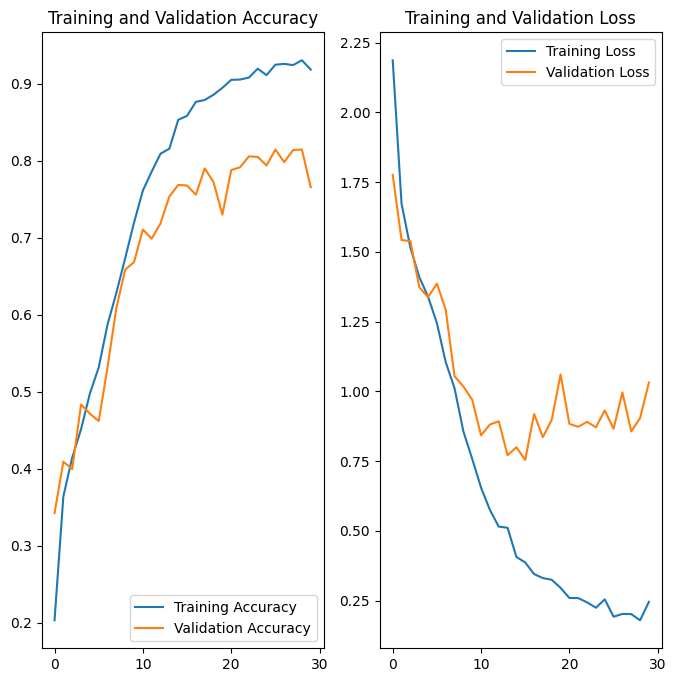

In [42]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### Observations for Model 3 || CNN Model 3 (With Balanced Classes using New Data from Augmentor)

1. After rebalancing the classes, we can observe the accuracy has increased and underfitting issue of model 2 is resolved.
2. The training and validation loss both are showing a downward trend with increasing no. of Epochs. However the difference between train and validation accuracy (91-76%) is approx 15% and we can experiment introducing L2 regularization and more dropout layers and check if this difference reduces.

### Creating Model 4 || CNN Model 4 (With L2 Regularization and Additional Dropout Layers)

In [29]:
from tensorflow.keras import Sequential, layers, regularizers
from tensorflow.keras.layers.experimental import preprocessing

model4 = Sequential()

model4.add(rescale)   #Rescaling Layer

#First Convulation layer
model4.add(layers.Conv2D(32,kernel_size=(2,2),activation='relu'))
model4.add(layers.MaxPool2D(pool_size=(2,2)))
model4.add(layers.Dropout(0.25))

#Second Convulation Layer
model4.add(layers.Conv2D(64,kernel_size=(2,2),activation='relu'))
model4.add(layers.MaxPool2D(pool_size=(2,2)))
model4.add(layers.Dropout(0.25))

#Third Convulation Layer
model4.add(layers.Conv2D(128,kernel_size=(2,2),activation='relu'))
model4.add(layers.MaxPool2D(pool_size=(2,2)))
model4.add(layers.Dropout(0.25))

#Flatten Layer
model4.add(layers.Flatten())

#Dense Layer
model4.add(layers.Dense(512,activation='relu'))

#Dropout layer
model4.add(layers.Dropout(0.5))

#Dense Layer
model4.add(layers.Dense(128,activation='relu'))

#Dropout layer with 50% Fraction of the input units to drop.
model4.add(layers.Dropout(0.50))

#Dense layer with Softmax activation function.
model4.add(layers.Dense(len(class_names),activation='softmax',kernel_regularizer=regularizers.l2(0.01)))

### Compiling Model 4 || CNN Model 4 (With L2 Regularization and Additional Dropout Layers)

In [30]:
model4.compile(optimizer="adam",loss = tf.keras.losses.SparseCategoricalCrossentropy(), metrics = ['accuracy'])

### Training Model 4 || CNN Model 4 (With L2 Regularization and Additional Dropout Layers)

In [31]:
epochs = 30
history = model4.fit(
  train_ds_new,
  validation_data=val_ds_new,
  epochs=epochs
)

Epoch 1/30
169/169 [==============================] - 55s 271ms/step - loss: 2.4996 - accuracy: 0.1552 - val_loss: 2.1829 - val_accuracy: 0.2339
Epoch 2/30
169/169 [==============================] - 44s 249ms/step - loss: 1.9931 - accuracy: 0.2932 - val_loss: 1.7688 - val_accuracy: 0.3853
Epoch 3/30
169/169 [==============================] - 42s 240ms/step - loss: 1.7063 - accuracy: 0.3807 - val_loss: 1.6350 - val_accuracy: 0.4001
Epoch 4/30
169/169 [==============================] - 42s 241ms/step - loss: 1.5924 - accuracy: 0.4204 - val_loss: 1.5823 - val_accuracy: 0.3994
Epoch 5/30
169/169 [==============================] - 42s 240ms/step - loss: 1.5215 - accuracy: 0.4421 - val_loss: 1.4798 - val_accuracy: 0.4425
Epoch 6/30
169/169 [==============================] - 42s 239ms/step - loss: 1.4093 - accuracy: 0.4837 - val_loss: 1.4444 - val_accuracy: 0.4529
Epoch 7/30
169/169 [==============================] - 41s 238ms/step - loss: 1.3297 - accuracy: 0.5167 - val_loss: 1.3054 - val_ac

### Visualizing the training results for Model 4 || CNN Model 4 (With L2 Regularization and Additional Dropout Layers)

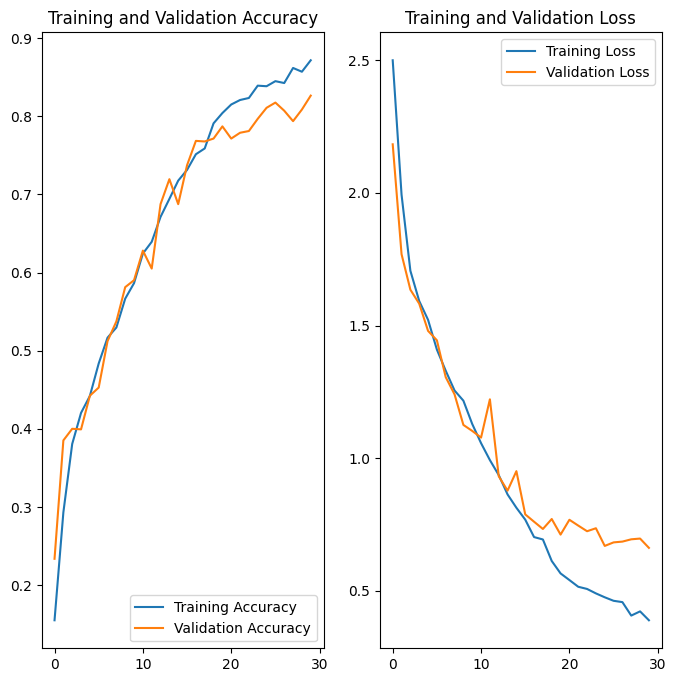

In [33]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### Observations for Model 4 || CNN Model 4 (With L2 Regularization and Additional Dropout Layers)

1. After 30 Epochs, the training accuracy is 87% and validation accuracy is 82%. and difference between them is 5% which seems good enough and the model 4 seems to be optimum.
2. L2 regularization has further reduced overfitting.
3. Both training and validation loss show downward trend with increasing no. of Epochs

## Making Predictions on Model 4

In [47]:
test_ds=tf.keras.preprocessing.image_dataset_from_directory(data_dir_test,image_size=(img_width,img_height),
                                                            shuffle=False,batch_size=120)
predictions=model4.predict(test_ds)
score = tf.nn.softmax(predictions)
_, labels = tuple(zip(*test_ds))
print(labels)
print()
print(np.argmax(score,axis=-1))
print()

from sklearn.metrics import accuracy_score
print('Test Accuracy')
accuracy_score(labels[0].numpy(),np.argmax(score,axis=-1))

Found 118 files belonging to 9 classes.
1/1 [==============================] - 42s 42s/step
(<tf.Tensor: shape=(118,), dtype=int32, numpy=
array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,
       7, 7, 7, 7, 7, 8, 8, 8], dtype=int32)>,)

[6 4 4 4 5 0 5 4 0 4 4 0 5 0 0 0 1 2 0 5 5 1 5 3 1 1 0 3 5 1 1 7 5 4 5 3 3
 5 4 7 5 2 1 1 2 2 2 7 4 5 4 4 5 3 5 3 4 3 4 3 4 4 3 3 4 4 3 3 4 4 4 4 4 3
 5 5 4 4 4 4 5 5 5 5 2 7 4 5 5 5 5 5 1 5 5 7 3 3 3 3 5 4 4 4 7 7 4 7 1 1 7
 5 7 7 7 8 1 8]

Test Accuracy


0.4491525423728814

<mark> **Observation: The test accuracy is low probabily because test data has very less count of images and is not representative enough of overall distribution of data** </mark>